# Figure 2 - Probability of exceeding warming thresholds 1.5ºC

This notebook includes the code to plot Figure 2 - the probability of exceeding 1.5ºC warming threshold for the three SSP scenarios.

---------------

Written by May Chim

Last updated: 26 July 2024

---------------

## Import packages and load figure adjustments

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import matplotlib.ticker as ticker
import matplotlib.patches as patches

In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['legend.edgecolor']='black'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['xtick.bottom']= 'True'
plt.rcParams['ytick.left']= 'True'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['xtick.major.size']='3.5'
plt.rcParams['ytick.major.size']='3.5'
plt.rcParams['xtick.major.width']='0.8'
plt.rcParams['ytick.major.width']='0.8'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

plt.rc('font', size=16) # controls default text sizes          
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

## Read data

In [3]:
# Read in FaIR simulation results

# Directory of data files
os.chdir('<path-to-directory-of-data>')

# Future projection with 1000-member stochastic volcanic forcing scenarios and internal variability
df2 = xr.open_dataset('stochastic_volcanoes_stochastic_climate.nc')

# Future projection with constant volcanic forcing (CMIP6 ScenarioMIP)
dn = xr.open_dataset('no_future_volcanoes.nc')

## Function

In [4]:
def calc_prob_temp_threshold(df,ssp,thres):
    
    # Function to calculate probability of exceeding warming thresholds
    
    count_num = []
    
    for t in range(87):
        
        # for each year from 2015 to 2101
        # count number of stochastic scenarios exceeding the temperature threshold
        
        count_num.append(np.sum(df[t,ssp,:] > thres).values/1000*100)

    return count_num # returns probability in percentage

## Figure 2 (Probability of exceeding 1.5ºC)

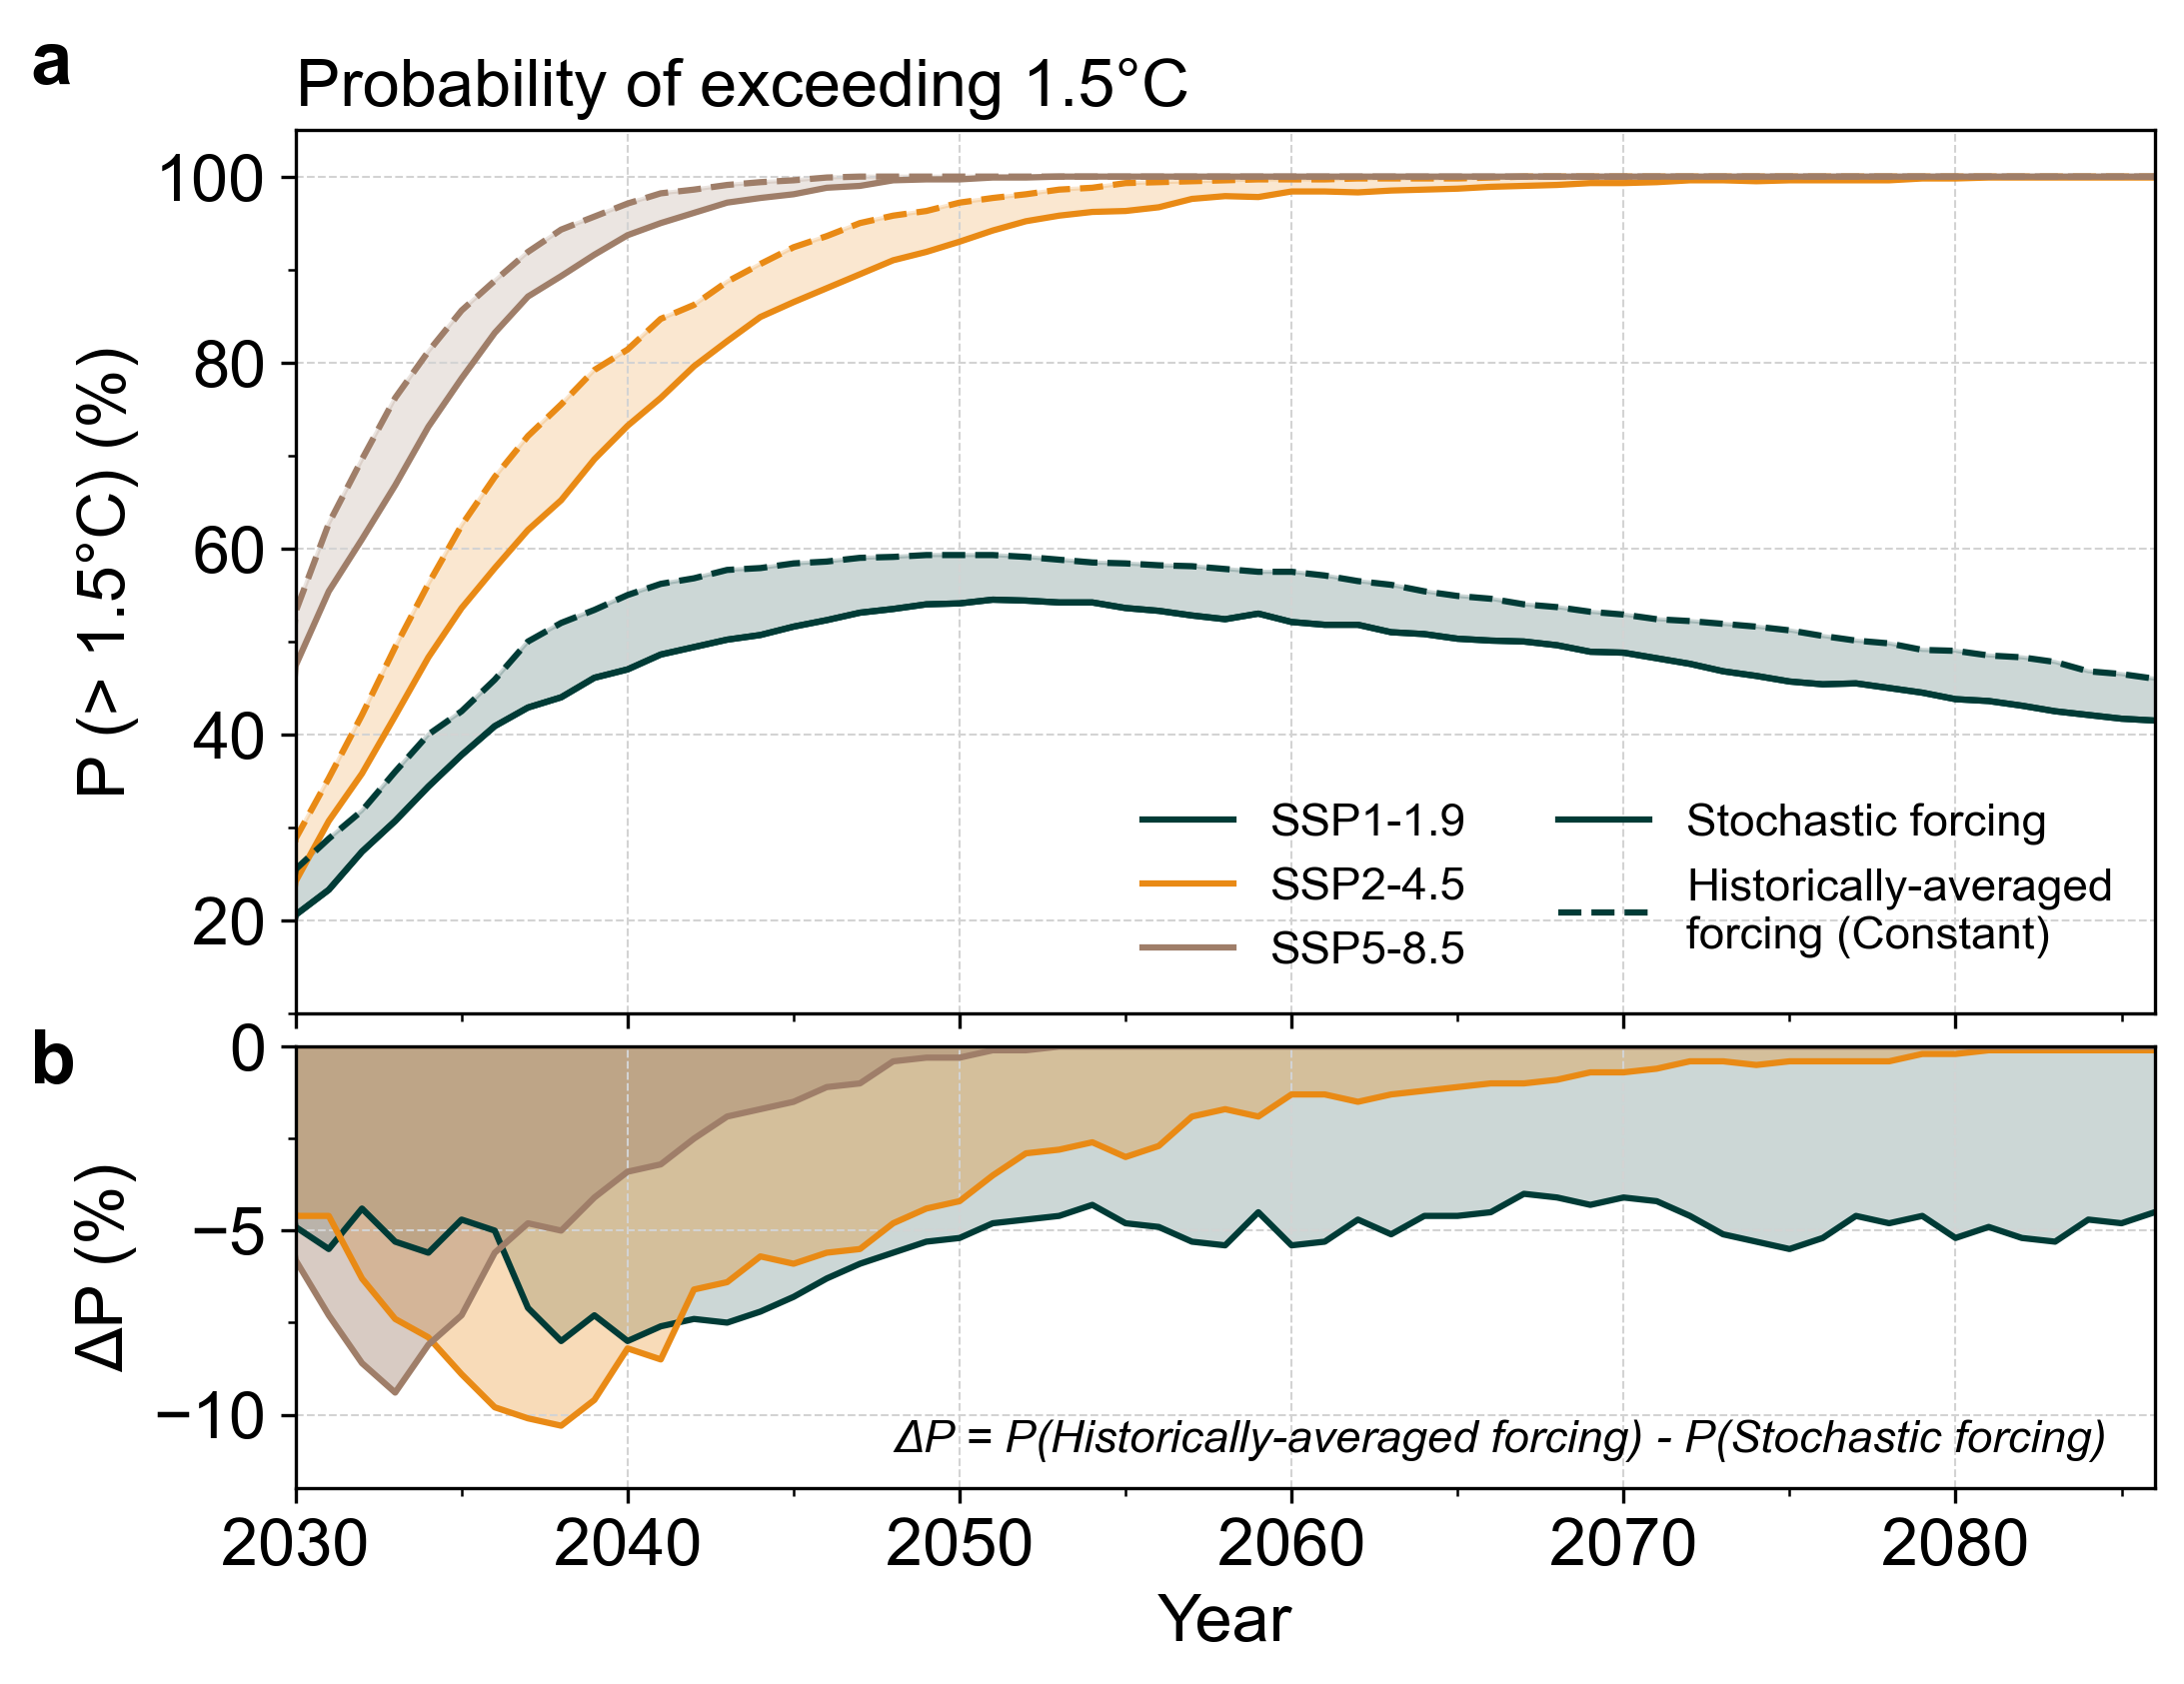

In [6]:
# Figure 2

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), dpi=300, gridspec_kw={'height_ratios': [2, 1]})
grid_settings = {'color': 'lightgray', 'linestyle': '--', 'linewidth': 0.5}

plt.subplots_adjust(hspace=0.05)
ax1.grid(True, **grid_settings)
ax2.grid(True, **grid_settings)

ax1.minorticks_on()
ax2.minorticks_on()

ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5)) 
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))


df = df2.temperature[165:,:,:].rolling(timebounds=30, center = True).mean()
const = dn.temperature[165:,:,:].rolling(timebounds=30, center = True).mean()

time = np.arange(2015,2102,1)

color = ['#003B36', '#E98A15', '#9F7E69']

ax1.plot(time, calc_prob_temp_threshold(df, 0, 1.5), color=color[0], lw = 1.5, label='SSP1-1.9')
ax1.fill_between(time, calc_prob_temp_threshold(df, 0, 1.5), calc_prob_temp_threshold(const, 0, 1.5), 
                 color=color[0], alpha=0.2)


ax1.fill_between(time, calc_prob_temp_threshold(df, 1, 1.5), calc_prob_temp_threshold(const, 1, 1.5), 
                 color=color[1], alpha=0.2)
ax1.plot(time, calc_prob_temp_threshold(df, 1, 1.5), color=color[1], lw = 1.5, label='SSP2-4.5')
ax1.plot(time, calc_prob_temp_threshold(const, 1, 1.5), color=color[1], lw = 1.5, ls='--')

ax1.fill_between(time, calc_prob_temp_threshold(df, 2, 1.5), calc_prob_temp_threshold(const, 2, 1.5), 
                 color=color[2], alpha=0.2)
ax1.plot(time, calc_prob_temp_threshold(df, 2, 1.5), color=color[2], lw = 1.5, label='SSP5-8.5')
ax1.plot(time, calc_prob_temp_threshold(const, 2, 1.5), color=color[2], lw = 1.5, ls='--')


ax1.plot(time, calc_prob_temp_threshold(df, 0, 1.5), color=color[0], lw = 1.5, label='Stochastic forcing')
ax1.plot(time, calc_prob_temp_threshold(const, 0, 1.5), color=color[0], lw = 1.5, ls='--', 
         label='Historically-averaged\nforcing (Constant)')


ax1.set_ylabel('P (> 1.5°C) (%)')
ax1.set_xticklabels([])
ax1.legend(ncol=2, fontsize = 11, loc = 'lower right', frameon=False)
ax1.set_xlim(2030, 2086)
ax1.set_ylim(10, 105)
ax1.set_title('Probability of exceeding 1.5°C', loc = 'left')

ax1.text(2022,110,'a', fontsize=18, fontweight='bold')
ax2.text(2022,-1,'b', fontsize=18, fontweight='bold')


prob_const = calc_prob_temp_threshold(const,0,1.5)
prob_df = calc_prob_temp_threshold(df,0,1.5)
diff = []
for x in range(87):
    diff.append(prob_df[x] - prob_const[x])

ax2.plot(time, diff, color =color[0], lw = 1.5, label = '1.5C, SSP1-1.9')
ax2.fill_between(time, 0, diff, color=color[0], alpha=0.2, label='SSP1-1.9')


prob_const = calc_prob_temp_threshold(const,1,1.5)
prob_df = calc_prob_temp_threshold(df,1,1.5)
diff = []
for x in range(87):
    diff.append(prob_df[x] - prob_const[x])

ax2.plot(time, diff, color =color[1], lw = 1.5, label = '1.5C, SSP2-4.5')
ax2.fill_between(time, 0, diff, color=color[1], alpha=0.3, label='SSP2-4.5')

prob_const = calc_prob_temp_threshold(const,2,1.5)
prob_df = calc_prob_temp_threshold(df,2,1.5)
diff = []
for x in range(87):
    diff.append(prob_df[x] - prob_const[x])

ax2.plot(time, diff, color =color[2], lw = 1.5, label = '1.5C, SSP5-8.5')
ax2.fill_between(time, 0, diff, color=color[2], alpha=0.4, label='SSP5-8.5')

ax2.text(2048, -11, 'ΔP = P(Historically-averaged forcing) - P(Stochastic forcing)', 
         fontsize = 11, style = 'italic')

ax2.set_ylabel('ΔP (%)')
ax2.set_xlabel('Year')
ax2.set_xlim(2030, 2086)
ax2.set_ylim(-12, 0)

plt.savefig('Figure2.pdf', format = 'pdf')